In [41]:
from typing import NamedTuple

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import pandas as pd

# Loading and storing data values

# Spectronometer calibration curve calculations
Calibration = NamedTuple("Calibration", slope=float, intercept=float)
# Converts from absorbance to concentration in mg / mL
calibration = Calibration(slope=8.13012586e01, intercept=2.81008571e-02)

# Bead diameters
bead_diameter = (  # m
    4.493 * 0.001,
    2.632 * 0.001,
    3.505 * 0.001,
)

TARTRAZINE_MOLAR_MASS = 0.5343  # kg / mol
TARTRAZINE_DENSITY = 1930.0  # kg / m^3
TARTRAZINE_VOLUME = 1.0 * 1e-6 # m^3
TARTRAZINE_DIFFUSIVITY = 4.9e-10  # m^2 / s
SOLUTION_VOLUME = 100 * 1e-6  # m^3

# Absorption at 427nm wavelength
sample_times = ( # s
    np.array(
        [
            454,
            628,
            909,
            1244,
            1534,
            1868,
            2145,
            2465,
            2854,
            3070,
        ]
    ),
    np.array(
        [
            333,
            630,
            1020,
            1320,
            1620,
            1920,
            2235,
            2533,
            2841,
        ]
    ),
    np.array(
        [
            315,
            612,
            923,
            1212,
            1560,
            1800,
        ]
    ),
)

spectro_trials = (
    pd.read_excel("./Data/Lab3/Final/Bead1.xlsx", sheet_name=None),  # Bead 1
    pd.read_excel("./Data/Lab3/Final/Bead2.xlsx", sheet_name=None),  # Bead 2
    pd.read_excel("./Data/Lab3/Final/Bead3.xlsx", sheet_name=None),  # Bead 3
)

concentrations = (  # kg / m^3
    [],
    [],
    [],
)
for trial, data in enumerate(spectro_trials):
    for i, sample in enumerate(data.values()):
        # Get the maximum value of the abs(orbance)
        max_abs = sample["abs"].max()
        conc = (1 / calibration.slope) * (max_abs - calibration.intercept)
        concentrations[trial].append(conc)
concentrations = (
    np.array(concentrations[0]),
    np.array(concentrations[1]),
    np.array(concentrations[2]),
)

print(concentrations)


(array([0.00076136, 0.00088435, 0.00100735, 0.00113035, 0.00113035,
       0.00113035, 0.00125335, 0.00137635, 0.00137635, 0.00137635]), array([0.00051536, 0.00063836, 0.00088435, 0.00088435, 0.00100735,
       0.00100735, 0.00162235, 0.00174535, 0.00174535]), array([0.00039236, 0.00051536, 0.00076136, 0.00076136, 0.00088435,
       0.00088435]))


-11.335234654592139
1.1944559507511822e-05


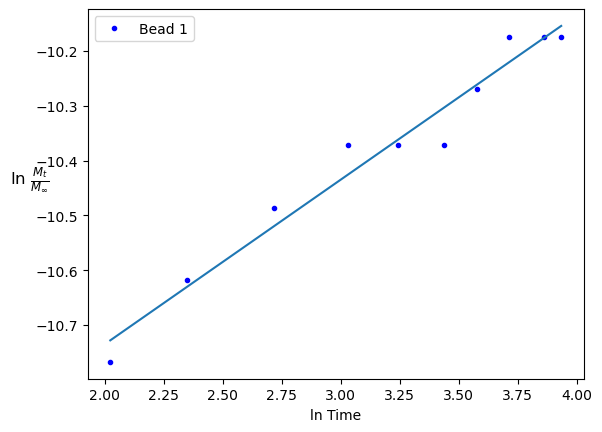

-12.27898326419981
4.648419613490492e-06


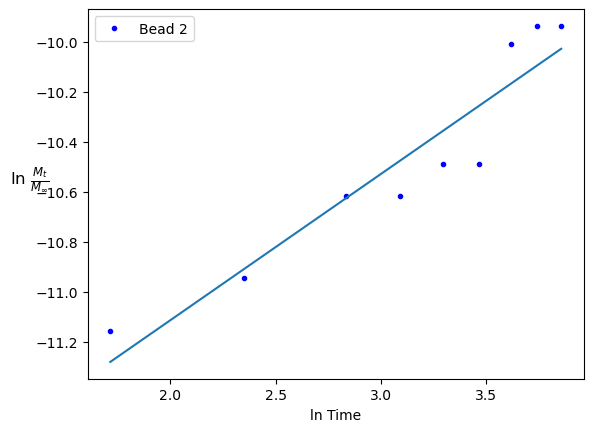

-12.243554572673963
4.816059127761702e-06


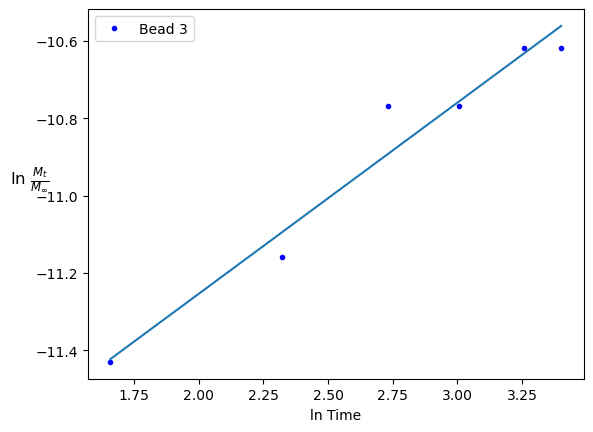

In [48]:
time_masses = [
    TARTRAZINE_MOLAR_MASS * SOLUTION_VOLUME * conc for conc in concentrations
]

inf_mass = TARTRAZINE_DENSITY * TARTRAZINE_VOLUME

n_vals = np.zeros(3)
k_vals = np.zeros(3)

for i in range(3):
    time_mins = sample_times[i] * (1 / 60)
    log_time = np.log(time_mins)
    log_mass = np.log(time_masses[i] / inf_mass)
    slope, inter = np.polyfit(log_time, log_mass, 1)
    n_vals[i] = slope
    print(inter)
    print(np.exp(inter))
    k_vals[i] = np.exp(inter)

    plt.plot(log_time, log_mass, "b.", label=f"Bead {i+1}")
    plt.plot(log_time, slope * log_time + inter)
    plt.xlabel("ln Time")
    plt.ylabel(r"ln $\frac{M_t}{M_\infty}$", rotation=0, fontdict={"size": 12})
    plt.legend()
    plt.show()

48.004800480048004
2.2023050650399973e-07
9.933015392815055e-09


/var/folders/14/2rn_z7gx1ddddfz3r54x1n3w0000gn/T/ipykernel_46405/3313538884.py:2: RuntimeWarning: divide by zero encountered in power
  return k * n * (time ** (n - 1))


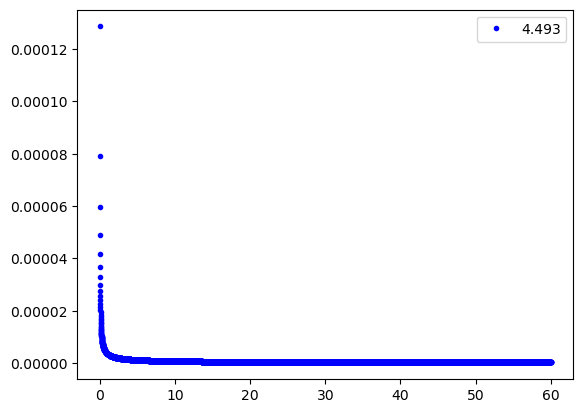

5.149731032099845e-07
1.3820513142550049e-08


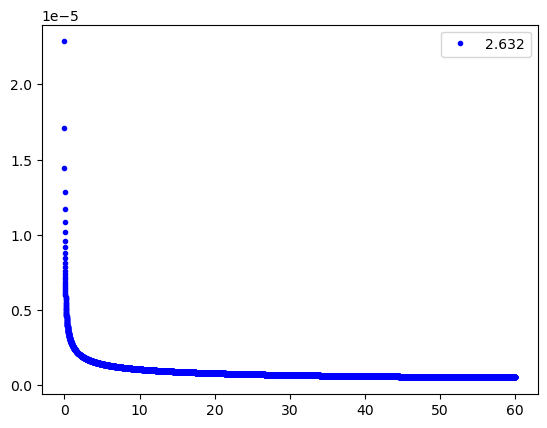

3.18063519289438e-07
1.0350937323086999e-08


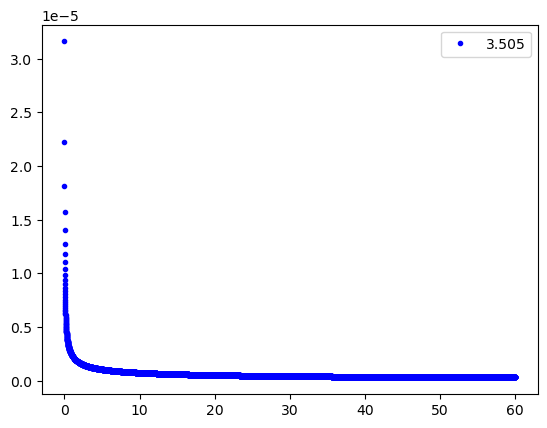

0.03335553655838699
0.001478987628612435
5.430934015053574e-05


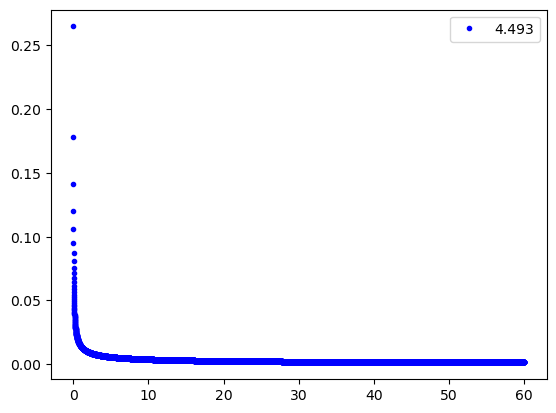

0.056940131366577794
0.00252473078091021
9.270967526457338e-05


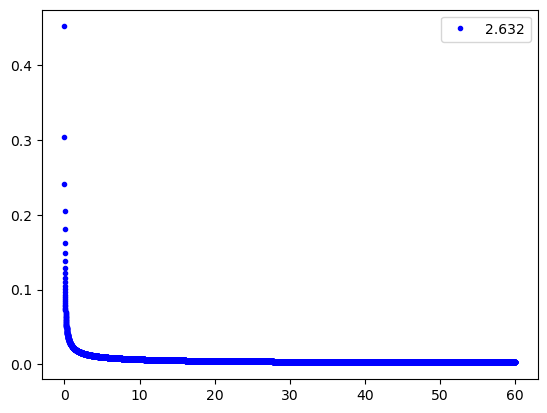

0.04275789607898225
0.001895889134195627
6.961822119724884e-05


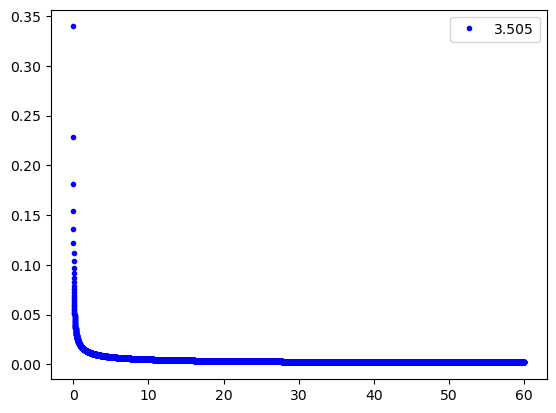

In [45]:
def deriv_F(k: float, n: float, time: np.ndarray) -> np.ndarray:
    return k * n * (time ** (n - 1))

n_theory = {"fick": 0.43, "poly": 0.85}

def k_theory(diff: float, rad: float) -> float:
    return 6 * np.sqrt(diff / (np.pi * rad ** 2))

times = np.linspace(0, 60, 10_000)
print(times[-2000])
for i in range(3):
    dFdt = deriv_F(k_vals[i], n_vals[i], times)
    plt.plot(times, dFdt, "b.", label=f"{bead_diameter[i] * 1000}")
    print(dFdt[-2000:].mean())
    print(dFdt[-2000:].std())
    plt.legend()
    plt.show()

for i in range(3):
    n = n_theory["fick"]
    k = k_theory(TARTRAZINE_DIFFUSIVITY, bead_diameter[i] / 2)
    print(k)
    dFdt = deriv_F(k, n, times)
    plt.plot(times, dFdt, "b.", label=f"{bead_diameter[i] * 1000}")
    print(dFdt[-2000:].mean())
    print(dFdt[-2000:].std())
    plt.legend()
    plt.show()
    


In [44]:
print(k_vals)
print(n_vals)

[1.19445595e-05 4.64841961e-06 4.81605913e-06]
[0.30006496 0.58328133 0.49477112]
